In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
tips = pd.read_csv('/content/drive/MyDrive/01Training/Data/Data/tips.csv')

In [30]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [32]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [33]:
tips.count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [34]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [35]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [36]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [37]:
tips._get_numeric_data()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [38]:
tip = tips['tip']

In [39]:
tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bef3ba400>,
      dtype=object)

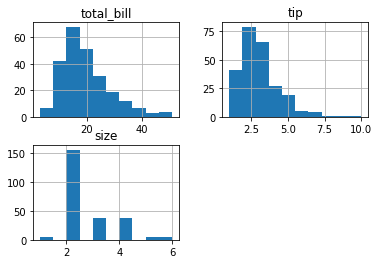

In [40]:
tips.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6bef1b0f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6bef1bc640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6bef1b0be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bef1bcd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bef1c6040>],
 'means': []}

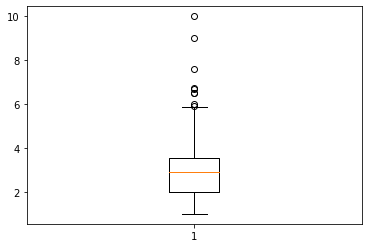

In [41]:
plt.boxplot(tip)

In [42]:
fig = px.scatter(data_frame = tips, x="total_bill", y="tip", size="size", color= "sex", trendline="ols")

In [43]:
fig.show()

(array([ 87.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 157.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

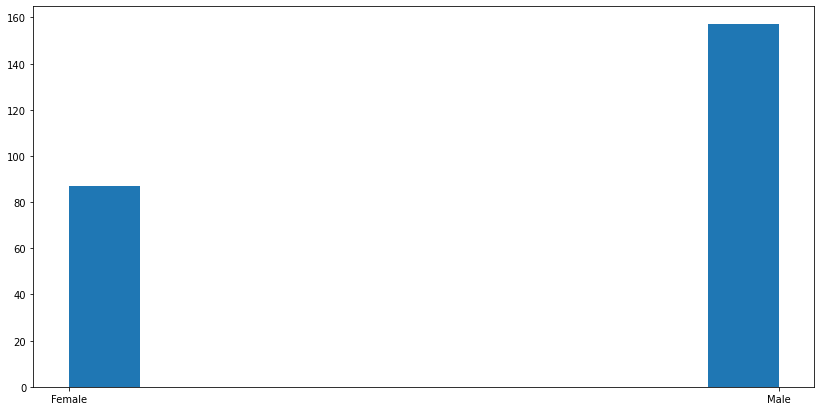

In [44]:
plt.figure(figsize = (14,7))
plt.hist(tips['sex'])

(array([176.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  68.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

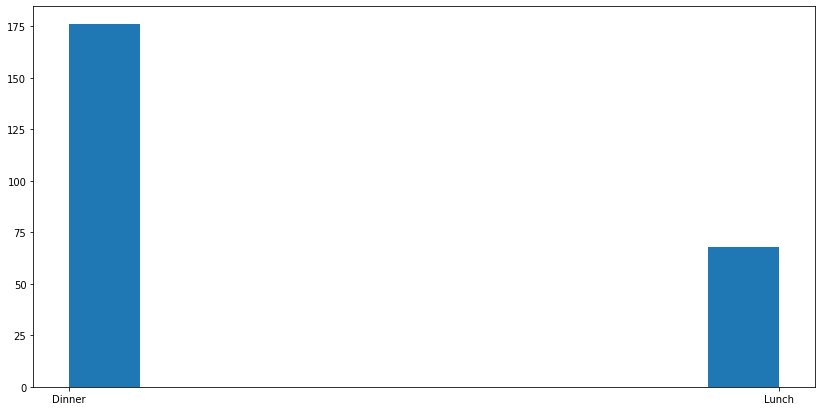

In [45]:
plt.figure(figsize = (14,7))
plt.hist(tips['time'])

In [46]:
tips["sex"] = tips["sex"].map({"Female": 0, "Male": 1})

In [47]:
tips['smoker'] = tips['smoker'].map({'No':0, 'Yes': 1})
tips['day'] = tips['day'].map({'Thur':0 , 'Fri': 1, 'Sat':2, 'Sun': 3})
tips['time'] = tips['time'].map({'Lunch': 0, 'Dinner': 1})

In [48]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,1,3
240,27.18,2.00,0,1,2,1,2
241,22.67,2.00,1,1,2,1,2
242,17.82,1.75,1,0,2,1,2


In [49]:
x = np.array(tips[["total_bill", "sex", "smoker", "day", "time", "size"]])
y = np.array(tips["tip"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=11)

In [50]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [51]:
model.fit(xtrain, ytrain)
model.predict(xtest)

array([4.15388176, 2.71745547, 2.90388351, 2.66970433, 3.35933864,
       2.39613834, 4.19689108, 2.18486385, 2.8810349 , 3.36918574,
       2.78000816, 3.62092156, 2.54430093, 2.1694065 , 2.31088144,
       2.81479933, 1.72848719, 2.42379353, 2.02971082, 2.00945619,
       3.85958587, 4.04715645, 3.28867832, 1.80557923, 2.40612983,
       2.28593457, 3.09561694, 2.45777302, 4.77260466, 2.38225235,
       2.47133373, 2.30792472, 3.56494844, 2.72873739, 2.19634739,
       4.76341159, 2.90062644, 5.41627778, 3.65873216, 2.48955   ,
       4.72208518, 2.3567529 , 3.39439135, 2.41216693, 4.42438016,
       3.81684574, 3.24260243, 2.48893751, 5.07403606])

In [52]:
pred = model.predict(xtest)
y_lin_pred = model.predict(xtest)

print('Score: %.3f' % model.score(xtrain, ytrain))
print('Mean squared error: %.3f' % mean_squared_error(ytest, y_lin_pred ))
print('R2 Score: %.3f' % r2_score(ytest, y_lin_pred))

Score: 0.442
Mean squared error: 0.548
R2 Score: 0.619


In [53]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 7, weights = 'uniform')
knn.fit(xtrain, ytrain)
y_knn = knn.predict(xtest)

print('Score: %.3f' % knn.score(xtrain, ytrain))
print('RMSE: %.3f' % mean_squared_error(ytest, y_knn))
print('R2 Score: %.5f' % r2_score(ytest, y_knn))

Score: 0.470
RMSE: 0.717
R2 Score: 0.50105
